In [1]:
#!pip install pandas
#!pip install xlrd

In [2]:
import pandas as pd

In [3]:
lsk = pd.read_excel('vr_report2.xls')

In [4]:
#lsk2 = pd.read_excel('vr_report2.xls')

В  общем суть такая. мы студентам давали делать презентации в VR  очках. кто-то делал 1 раз, кто-то 2 или 3. вопрос 1) есть ли корреляции чего-то с чем-то ( там количества слов-паразитов и качества контакта с аудиторией)  2) есть ли улучшение по тем, кто презентовал 2 и 3 раз по выделенным параметрам...

In [5]:
lsk[lsk['Фамилия']=='Trofimov']

,Фамилия,Имя,Отчество,Номер сессии,Дата,Длительность (минуты),Зрительный контакт,Потеря зрительного контакта (сек),Отсутствие зрительного контакта (раз),Взгляд на презентацию (раз),"Слова паразиты, общее количество","Слова паразиты, конкретные слова-паразиты и их количество","Грубые слова, общее количество",Распределение внимания,Внимание к посторонним объектам,Ссылка на аудиозапись выступления
192,Trofimov,Michil,A,90.0,22.11.23 16:54,3:16,82%,6.0,1.0,3.0,17.0,Like(8) Uh(2) So(4) Um(1) Kind of(2),0.0,Средняя,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/9...


In [6]:
lsk.columns

Index(['Фамилия', 'Имя', 'Отчество', 'Номер сессии', 'Дата',
       'Длительность (минуты)', 'Зрительный контакт',
       'Потеря зрительного контакта (сек)',
       'Отсутствие зрительного контакта (раз)', 'Взгляд на презентацию (раз)',
       'Слова паразиты, общее количество',
       'Слова паразиты, конкретные слова-паразиты и их количество',
       'Грубые слова, общее количество', 'Распределение внимания',
       'Внимание к посторонним объектам', 'Ссылка на аудиозапись выступления'],
      dtype='object')

Разницы между данными нет. просто второй датасет дополнен. мерджить не надо

In [7]:
#lsk = lsk2.copy()
cols = ['fam', 'name', 'otch', 'numsession', 'date',
       'dlitelnost', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'garbage',
       'num_shitwords', 'distrib_attent',
       'pass_attent', 'garba2']
lsk.columns = cols

In [8]:
lsk.head()

,fam,name,otch,numsession,date,dlitelnost,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,garbage,num_shitwords,distrib_attent,pass_attent,garba2
0,Сувала,Владислав,А,282.0,03.04.24 15:43,6:57,96%,2.0,0.0,0.0,13.0,I mean(1) Uh(5) Well(1) Sorry(1) Um(1) So(2) S...,0.0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/2...
1,Сувала,Владислав,А,281.0,03.04.24 15:33,7:06,98%,3.0,0.0,0.0,9.0,I mean(1) Well(3) Uh(4) Um(1),0.0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/2...
2,Стрелец,Татьяна,А,280.0,03.04.24 15:29,5:48,98%,1.0,0.0,3.0,13.0,You know(1) I mean(3) So(8) Like(1),0.0,Плохая,Оптимальное,https://pubspeak-skoltech.modumlab.com/audio/2...
3,Заименко,Ангелина,А,279.0,03.04.24 15:26,6:20,0%,380.0,1.0,0.0,10.0,Like(5) So(4) Um(1),0.0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/2...
4,Заименко,Ангелина,А,278.0,03.04.24 15:19,0:34,0%,34.0,1.0,0.0,1.0,So(1),0.0,Плохая,Избыточное,https://pubspeak-skoltech.modumlab.com/audio/2...


In [9]:
'''
lsk['dlitelnost'] = lsk['dlitelnost'].str.replace(' ', '')
lsk['dlitelnost_min'] = lsk['dlitelnost'].str[0]
lsk['dlitelnost_sec_str'] = lsk['dlitelnost'].str[2:]
lsk['dlitelnost_secs'] = lsk['dlitelnost_min'].astype('Int32')*60 + lsk['dlitelnost_sec_str'].astype('Int32')
'''
lsk['dlitelnost_secs'] = 0
def get_sec(row):
    """Get seconds from time."""
    if not (isinstance(row['dlitelnost'], int) or isinstance(row['dlitelnost'], float)) : 
        m, s = row['dlitelnost'].split(':')  
    else :
        m, s = 0, row['dlitelnost']
    try:
        row['dlitelnost_secs'] = int(m) * 60 + int(s)
    except ValueError as e:
        print(str(e))
    return row

lsk = lsk.apply(get_sec, axis=1)

cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer
cannot convert float NaN to integer


In [10]:
formati = '%d.%m.%y %H:%M'
lsk.date = pd.to_datetime(lsk["date"], format=formati)
#formati2 = '%'
#lsk['dlitelnost']

In [11]:
lsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fam                  203 non-null    object        
 1   name                 203 non-null    object        
 2   otch                 203 non-null    object        
 3   numsession           203 non-null    float64       
 4   date                 203 non-null    datetime64[ns]
 5   dlitelnost           203 non-null    object        
 6   eye_contact          203 non-null    object        
 7   time_losing_contact  203 non-null    float64       
 8   number_losing        203 non-null    float64       
 9   num_preslook         203 non-null    float64       
 10  num_fillerwords      203 non-null    float64       
 11  garbage              146 non-null    object        
 12  num_shitwords        203 non-null    float64       
 13  distrib_attent       203 non-null  

In [12]:
lsk.describe()

,numsession,date,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,dlitelnost_secs
count,203.000000,203,203.000000,203.000000,203.000000,203.000000,203.000000,212.000000
mean,178.295567,2024-01-16 05:56:10.640393984,15.433498,0.940887,1.458128,9.118227,0.009852,157.429245
min,71.000000,2023-11-22 13:27:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.500000,2023-12-12 17:32:00,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,181.000000,2024-01-11 15:29:00,3.000000,0.000000,0.000000,5.000000,0.000000,115.500000
75%,231.500000,2024-01-24 15:34:30,9.000000,1.000000,1.000000,13.000000,0.000000,264.000000
max,282.000000,2024-04-03 15:43:00,559.000000,12.000000,25.000000,62.000000,1.000000,676.000000
std,62.080922,NaN,58.155214,1.839192,3.692643,11.324459,0.099012,150.014722


In [13]:
nmin = 1
lsk = lsk[lsk['dlitelnost_secs']>60*nmin]

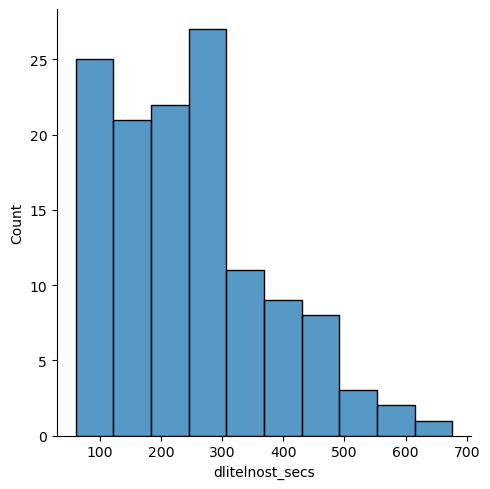

In [14]:
import seaborn as sns
sns.displot(lsk, x = 'dlitelnost_secs')

In [15]:
lsk['eye_contact'] = lsk['eye_contact'].str.replace('%', '', regex=True)

In [16]:
lsk["eye_contact"] = lsk["eye_contact"].fillna(0)
lsk["eye_contact"] = lsk["eye_contact"].astype(int)

In [17]:
lsk = lsk[['fam', 'name', 'date',
       'dlitelnost_secs', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'num_shitwords', 'distrib_attent',
       'pass_attent' ]]

In [18]:
lsk.groupby(['distrib_attent']).count()

,fam,name,date,dlitelnost_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,pass_attent
distrib_attent,,,,,,,,,,,
Плохая,118,118,118,118,118,118,118,118,118,118,118
Средняя,10,10,10,10,10,10,10,10,10,10,10
Хорошая,1,1,1,1,1,1,1,1,1,1,1


In [19]:
def categ(item):
    if item=='Плохая':
        temp = 1
    elif item =='Средняя':
        temp = 2
    else:
        temp = 3
    return temp    

In [20]:
def categ2(item):
    if item=='Избыточное':
        temp = 0
    else:    
        temp = 1
    return temp   

In [22]:
lsk['distrib_attent'] = lsk['distrib_attent'].apply(categ)

In [23]:
lsk.groupby(['pass_attent']).count()
lsk['pass_attent'] = lsk['pass_attent'].apply(categ2)

In [24]:
lsk.describe()

,date,dlitelnost_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
count,129,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2024-01-14 11:51:55.813953536,246.356589,80.480620,21.077519,1.279070,2.155039,14.015504,0.007752,1.093023,0.403101
min,2023-11-22 13:27:00,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2023-12-12 16:54:00,154.000000,78.000000,2.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000
50%,2024-01-11 15:30:00,229.000000,91.000000,4.000000,0.000000,0.000000,11.000000,0.000000,1.000000,0.000000
75%,2024-01-25 15:34:00,313.000000,97.000000,9.000000,2.000000,2.000000,21.000000,0.000000,1.000000,1.000000
max,2024-04-03 15:43:00,676.000000,100.000000,559.000000,12.000000,25.000000,62.000000,1.000000,3.000000,1.000000
std,NaN,128.688383,26.171042,72.154306,2.193658,4.471174,11.641107,0.088045,0.317260,0.492433


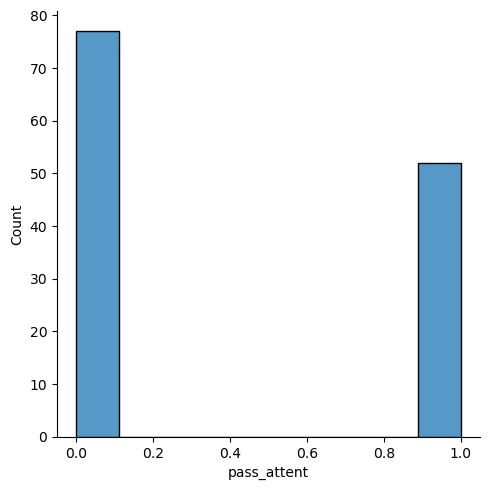

In [26]:
sns.displot(lsk['pass_attent'])

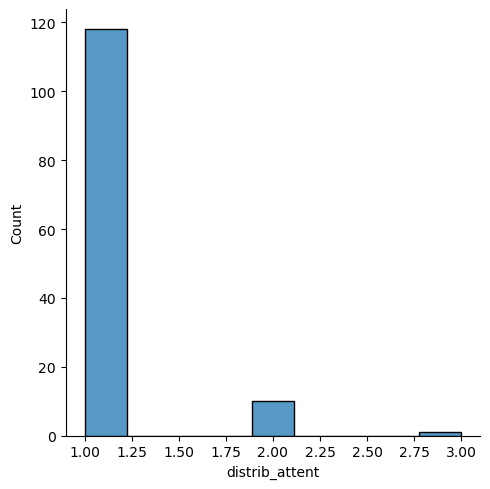

In [27]:
sns.displot(lsk['distrib_attent'])

In [28]:
lsk = lsk.fillna(0)

In [29]:
df2 = lsk.sort_values(['fam', 'name', 'date'],
              ascending = [True, True, True])

df2 = df2[df2.duplicated(subset=['fam', 'name'])]
first = df2.drop_duplicates(subset=['fam', 'name'], keep = 'first')
last = df2.drop_duplicates(subset=['fam', 'name'], keep = 'last')

In [30]:
df2.head(10)

,fam,name,date,dlitelnost_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
113,Asefa,Dinaol,2024-01-09 15:41:00,114,65,8.0,3.0,0.0,11.0,0.0,1,0
110,Asefa,Dinaol,2024-01-11 14:35:00,154,62,8.0,2.0,0.0,15.0,0.0,1,0
91,Asefa,Dinaol,2024-01-18 14:30:00,131,74,9.0,3.0,5.0,8.0,0.0,1,1
89,Asefa,Dinaol,2024-01-18 14:35:00,238,79,7.0,3.0,10.0,13.0,0.0,1,0
84,Asefa,Dinaol,2024-01-18 14:49:00,264,73,13.0,2.0,12.0,34.0,0.0,1,1
76,Asefa,Dinaol,2024-01-23 14:53:00,291,80,13.0,1.0,3.0,27.0,0.0,1,0
60,Asefa,Dinaol,2024-01-23 15:17:00,385,77,13.0,4.0,10.0,25.0,0.0,1,0
44,Asefa,Dinaol,2024-01-25 15:41:00,321,78,9.0,3.0,16.0,26.0,0.0,1,1
83,Asfaw,Selamawit,2024-01-18 14:50:00,106,46,12.0,5.0,0.0,0.0,0.0,1,0
81,Asfaw,Selamawit,2024-01-18 14:55:00,173,66,12.0,4.0,4.0,18.0,0.0,1,0


In [31]:
df2.describe()

,date,dlitelnost_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
count,82,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2024-01-22 14:18:53.414634240,246.878049,85.085366,17.695122,0.987805,2.036585,15.109756,0.012195,1.097561,0.475610
min,2023-11-22 13:39:00,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2024-01-09 15:33:15,157.750000,80.000000,2.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000
50%,2024-01-18 14:57:30,238.500000,93.500000,3.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000
75%,2024-01-25 15:39:45,316.000000,98.000000,8.000000,1.000000,2.000000,21.750000,0.000000,1.000000,1.000000
max,2024-04-03 15:43:00,564.000000,100.000000,380.000000,12.000000,21.000000,62.000000,1.000000,3.000000,1.000000
std,NaN,120.181693,22.501688,65.512733,2.057770,4.229366,11.948455,0.110432,0.337374,0.502478


In [32]:
df3 = pd.merge(first, last, on=['fam','name'], how = 'inner')


In [33]:
dff1 = df3[['date_x', 'dlitelnost_secs_x', 'eye_contact_x',
       'time_losing_contact_x', 'number_losing_x', 'num_preslook_x',
       'num_fillerwords_x', 'num_shitwords_x', 'distrib_attent_x', 'pass_attent_x']]
dff2 = df3[['date_y', 'dlitelnost_secs_y', 'eye_contact_y', 'time_losing_contact_y',
       'number_losing_y', 'num_preslook_y', 'num_fillerwords_y', 'num_shitwords_y',
       'distrib_attent_y', 'pass_attent_y']]
dff1.columns = [ 'date',
       'duration_secs', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'num_shitwords', 'distrib_attent',
       'pass_attent' ]
dff2.columns = [ 'date',
       'duration_secs', 'eye_contact',
       'time_losing_contact',
       'number_losing', 'num_preslook',
       'num_fillerwords',
       'num_shitwords', 'distrib_attent',
       'pass_attent' ]

In [34]:
dff2.head()

,date,duration_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
0,2024-01-25 15:41:00,321,78,9.0,3.0,16.0,26.0,0.0,1,1
1,2024-01-25 16:00:00,264,96,3.0,0.0,0.0,36.0,0.0,1,1
2,2023-11-22 17:05:00,232,90,3.0,0.0,0.0,12.0,0.0,1,0
3,2024-01-25 15:41:00,340,94,3.0,0.0,2.0,31.0,0.0,1,0
4,2023-11-22 13:39:00,168,98,1.0,0.0,0.0,5.0,0.0,1,1


In [35]:
import numpy as np
import pingouin as pg

Начинаем анализ

In [36]:
import scipy.stats as stats

In [37]:
res = stats.wilcoxon(dff1[['time_losing_contact']], dff2[['time_losing_contact']])
res

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))


WilcoxonResult(statistic=array([56.]), pvalue=array([0.53430978]))

In [38]:
res = stats.wilcoxon(dff1[['time_losing_contact']], dff2[['time_losing_contact']])
st = res.statistic
st[0]
pval = res.pvalue
pval[0]

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))


0.5343097756066597

In [39]:
stats.wilcoxon(dff1[['eye_contact']], dff2[['eye_contact']])

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))


WilcoxonResult(statistic=array([54.5]), pvalue=array([0.29760448]))

In [40]:
import seaborn as sns
import numpy as np  # для треугольной матрицы в хитмапе, чтобы красиво

In [41]:
sns.set_theme(style="white")

In [42]:
dff1.head()

,date,duration_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords,num_shitwords,distrib_attent,pass_attent
0,2024-01-09 15:41:00,114,65,8.0,3.0,0.0,11.0,0.0,1,0
1,2024-01-18 14:50:00,106,46,12.0,5.0,0.0,0.0,0.0,1,0
2,2023-11-22 17:05:00,232,90,3.0,0.0,0.0,12.0,0.0,1,0
3,2024-01-09 13:35:00,65,100,0.0,0.0,0.0,2.0,0.0,1,1
4,2023-11-22 13:39:00,168,98,1.0,0.0,0.0,5.0,0.0,1,1


In [56]:
from scipy.stats import mannwhitneyu

#stats.wilcoxon(lsk[lsk['pass_attent']==0]['num_fillerwords'], lsk[lsk['pass_attent']==1]['num_fillerwords'])
pval = mannwhitneyu(lsk[lsk['pass_attent']==0]['num_fillerwords'], lsk[lsk['pass_attent']==1]['num_fillerwords'])[1]
u = mannwhitneyu(lsk[lsk['pass_attent']==0]['num_fillerwords'], lsk[lsk['pass_attent']==1]['num_fillerwords'])[0]

Text(0.7, 52, 'p value = 0.002')

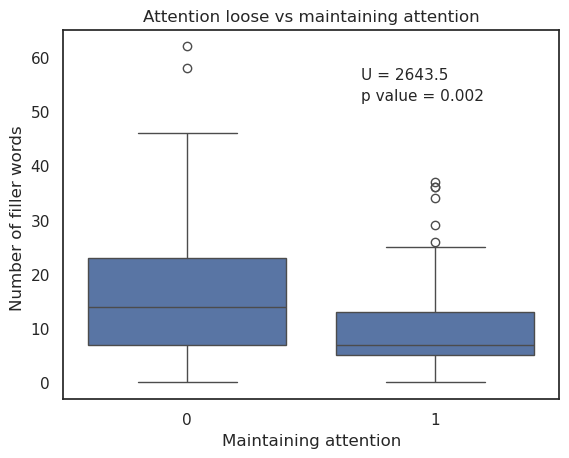

In [65]:
import matplotlib.pyplot as plt
plot1 = sns.boxplot(data=lsk, x="pass_attent", y="num_fillerwords")
plot1.set_title('Attention loose vs maintaining attention')
plot1.set(xlabel='Maintaining attention', ylabel='Number of filler words ')
#plot1.legend(loc = best, )
#f'p value = {pval:.3f}'
plt.text(0.7, 56, f'U = {u:.1f}', rotation = 0, fontsize = 11)         # Size
      # Style)

plt.text(0.7, 52, f'p value = {pval:.3f}', rotation = 0, fontsize = 11)         # Size
      # Style)

In [71]:
pval = stats.wilcoxon(dff1[dff1['pass_attent']==0]['num_fillerwords'], dff2[dff1['pass_attent']==0]['num_fillerwords'])[1]
u = stats.wilcoxon(dff1[dff1['pass_attent']==0]['num_fillerwords'], dff2[dff1['pass_attent']==0]['num_fillerwords'])[0]
print({u,pval})

{0.8239269463283861, 30.5}


/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [72]:
stats.wilcoxon(dff1[dff1['pass_attent']==1]['num_fillerwords'], dff2[dff1['pass_attent']==1]['num_fillerwords'])

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


WilcoxonResult(statistic=5.0, pvalue=0.24886387493792206)

In [82]:
from statsmodels.stats.contingency_tables import mcnemar
data_crosstab = pd.crosstab(dff1['pass_attent'], 
                            dff2['pass_attent'],  
                               margins = False) 
data_crosstab.values
result = mcnemar(data_crosstab.values, exact=True)
result.pvalue

0.2890625

In [ ]:
result.statistic

[Text(0.5, 19.049999999999997, 'Maintaining attention\nChi squared = 2.0\np value = 0.289')]

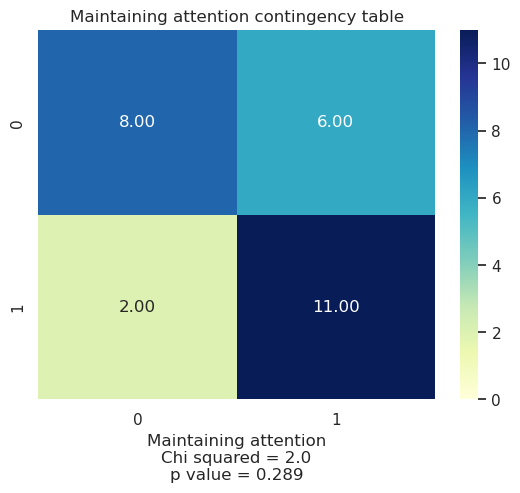

In [91]:
plot2 = sns.heatmap(data_crosstab.values, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=11)

plot2.set_title('Maintaining attention contingency table')
plot2.set(xlabel='Maintaining attention\n' + f'Chi squared = {result.statistic:.1f}\n'+f'p value = {result.pvalue:.3f}')
#plot1.legend(loc = best, )
#f'p value = {pval:.3f}'

In [43]:
dff1.columns

Index(['date', 'duration_secs', 'eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords', 'num_shitwords',
       'distrib_attent', 'pass_attent'],
      dtype='object')

In [39]:
corr_matrix1 = dff1[['duration_secs', 'eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']].corr(method = 'spearman')
corr_matrix2 = dff2[['duration_secs','eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']].corr(method = 'spearman')

num1 = dff1[['duration_secs', 'eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']]
num2 = dff2[['duration_secs','eye_contact', 'time_losing_contact',
       'number_losing', 'num_preslook', 'num_fillerwords']]

<Axes: >

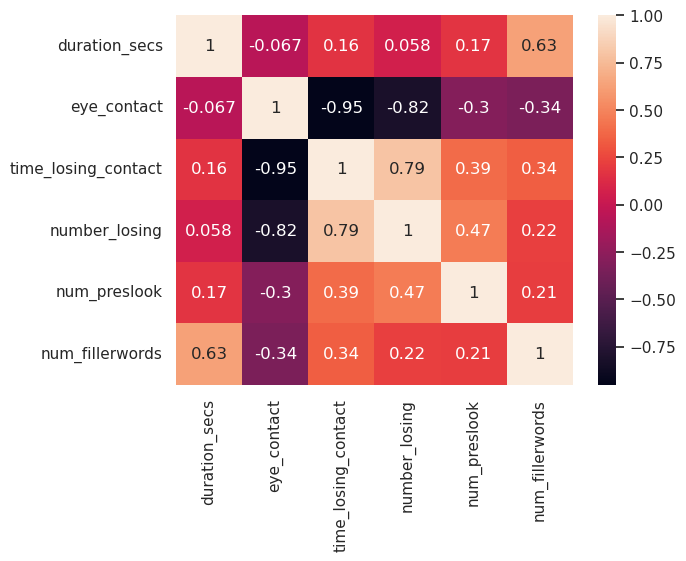

In [40]:
#sns.heatmap(corr_matrix, annot=True)
sns.heatmap(corr_matrix1, annot=True)


<Axes: >

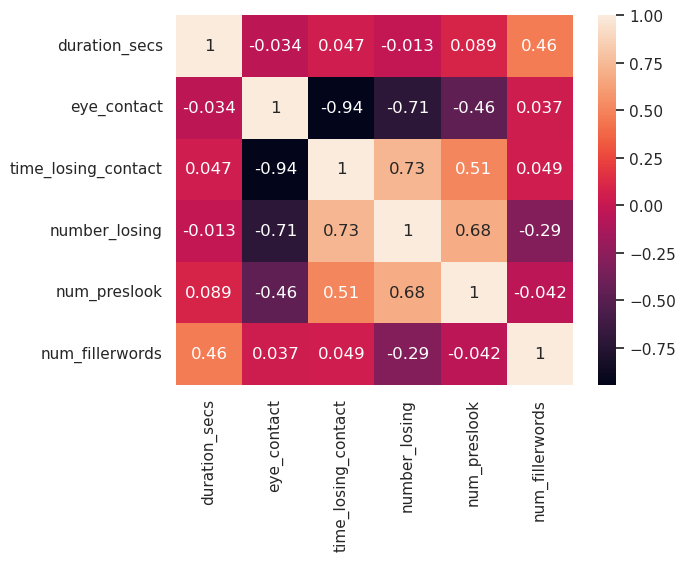

In [41]:
sns.heatmap(corr_matrix2, annot=True)

In [175]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product

def compute_corr_and_p(df1, df2):
  corrs = pd.DataFrame(index=df1.columns, columns=df2.columns, dtype=np.float64)
  pvals = corrs.copy()
  
  for i, j in product(df1.columns, df2.columns):
    corrs.loc[i,j], pvals.loc[i,j] = spearmanr(df1[i], df2[j])
  
  return corrs, pvals

def plot(corrs, pvals, siglevel=.01):
  #mask = (pvals.values >= siglevel) + (np.zeros_like(corrs, dtype=bool))
  
  mask = np.triu(np.ones_like(corrs, dtype=bool))
  #mask[np.triu_indices_from(mask) | (pvals.values >= siglevel) + (np.zeros_like(corrs, dtype=bool))] = True
  mask |= np.abs(pvals) >= siglevel
  #np.fill_diagonal(mask, True)

  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  #sns.heatmap(corrs, annot=True, mask=mask, cmap=cmap, center=0, square=True, vmin=-1, vmax=1,linewidths=.5,
  #         cbar_kws={'shrink': .7})
  #https://stackoverflow.com/questions/66171071/how-to-restrict-a-correlation-heatmap-to-interesting-cells-and-add-stars-to-mark

  corrs = corrs[~mask]  # fill in NaN in the non-desired cells

  remove_empty_rows_and_cols = False
  if remove_empty_rows_and_cols:
      wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
      wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
      corrs = corrs.iloc[wanted_cols, wanted_rows]

  heatmap = sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, cmap=cmap, center=0,linewidths=.5,cbar_kws={'shrink': .7})
  heatmap.set_title('Triangle heatmap with only \n significant correlations (p value < 0.05)', fontdict={'fontsize': 17}, pad=16)
  return heatmap

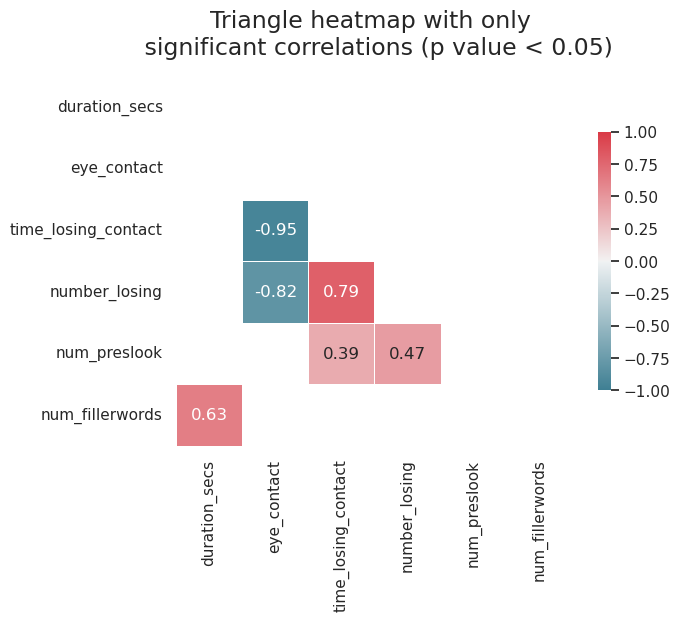

In [176]:
sns.set_theme(style="white")
corrs1, pvals1 = compute_corr_and_p(num1, num1)
np.zeros_like(corrs1, dtype=bool)
heat1 = plot(corrs1, pvals1 ,siglevel=0.05)
#np.zeros_like(num1)

#heat1.set_title('First presentation heatmap with only significant correlations (p_value < 0.05)')

<Axes: title={'center': 'Triangle heatmap with only \n significant correlations (p value < 0.05)'}>

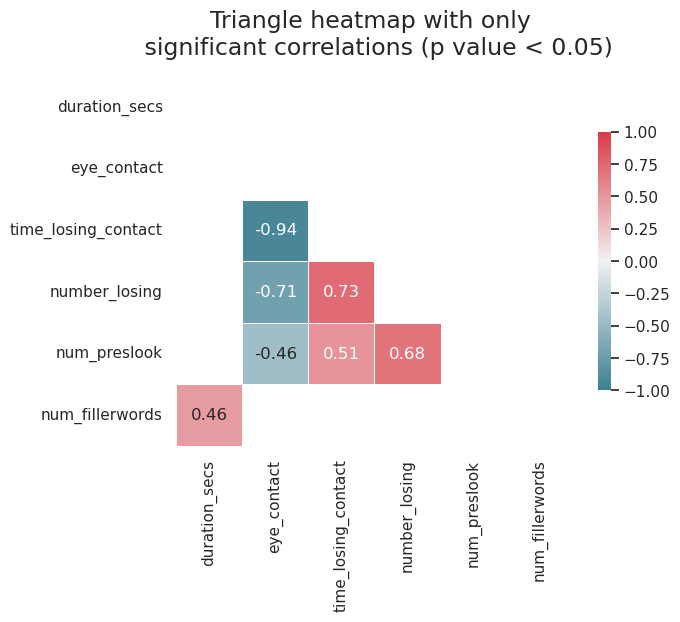

In [177]:
corrs2, pvals2 = compute_corr_and_p(num2, num2)
plot(corrs2, pvals2 ,siglevel=0.05)
#np.zeros_like(num1)

In [42]:
x = dff1['eye_contact'].tolist()
y = dff2['eye_contact'].tolist()
pg.ttest(x,y)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.525639,52,two-sided,0.601374,"[-19.27, 11.27]",0.143061,0.307,0.081018


In [43]:
corrs1 = pg.pairwise_corr(num1, method='spearman').round(3)
corrs1[corrs1['p-unc']<0.05]

,X,Y,method,alternative,n,r,CI95%,p-unc,power
4,duration_secs,num_fillerwords,spearman,two-sided,27,0.629,"[0.33, 0.81]",0.000,0.957
5,eye_contact,time_losing_contact,spearman,two-sided,27,-0.953,"[-0.98, -0.9]",0.000,1.000
6,eye_contact,number_losing,spearman,two-sided,27,-0.820,"[-0.91, -0.64]",0.000,1.000
9,time_losing_contact,number_losing,spearman,two-sided,27,0.794,"[0.59, 0.9]",0.000,1.000
10,time_losing_contact,num_preslook,spearman,two-sided,27,0.390,"[0.01, 0.67]",0.044,0.536
12,number_losing,num_preslook,spearman,two-sided,27,0.466,"[0.1, 0.72]",0.014,0.710


In [44]:
corrs2 = pg.pairwise_corr(num2, method='spearman').round(3)
corrs2[corrs2['p-unc']<0.05]

,X,Y,method,alternative,n,r,CI95%,p-unc,power
4,duration_secs,num_fillerwords,spearman,two-sided,27,0.464,"[0.1, 0.72]",0.015,0.705
5,eye_contact,time_losing_contact,spearman,two-sided,27,-0.944,"[-0.97, -0.88]",0.000,1.000
6,eye_contact,number_losing,spearman,two-sided,27,-0.714,"[-0.86, -0.46]",0.000,0.994
7,eye_contact,num_preslook,spearman,two-sided,27,-0.460,"[-0.72, -0.1]",0.016,0.697
9,time_losing_contact,number_losing,spearman,two-sided,27,0.727,"[0.48, 0.87]",0.000,0.996
10,time_losing_contact,num_preslook,spearman,two-sided,27,0.513,"[0.17, 0.75]",0.006,0.805
12,number_losing,num_preslook,spearman,two-sided,27,0.684,"[0.41, 0.84]",0.000,0.986


In [45]:
corrs1.to_csv('corrtable1.tsv', sep = '\t', index = False)
corrs2.to_csv('corrtable2.tsv', sep = '\t', index = False)

In [46]:
rcorr1 = pg.rcorr(num1, method='spearman')
rcorr1.to_csv('spearman_firstpres.tsv', sep = '\t', index = False)
rcorr1

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/pingouin/correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,duration_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords
duration_secs,-,,,,,***
eye_contact,-0.067,-,***,***,,
time_losing_contact,0.163,-0.953,-,***,*,
number_losing,0.058,-0.82,0.794,-,*,
num_preslook,0.169,-0.299,0.39,0.466,-,
num_fillerwords,0.629,-0.337,0.337,0.218,0.208,-


In [47]:
rcorr2 = pg.rcorr(num2, method='spearman')
rcorr2.to_csv('spearman_secondpres.tsv', sep = '\t', index = False)
rcorr2

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/pingouin/correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,duration_secs,eye_contact,time_losing_contact,number_losing,num_preslook,num_fillerwords
duration_secs,-,,,,,*
eye_contact,-0.034,-,***,***,*,
time_losing_contact,0.047,-0.944,-,***,**,
number_losing,-0.013,-0.714,0.727,-,***,
num_preslook,0.089,-0.46,0.513,0.684,-,
num_fillerwords,0.464,0.037,0.049,-0.295,-0.042,-


In [48]:
x = dff1['eye_contact'].tolist()
y = dff2['eye_contact'].tolist()
pg.wilcoxon(x, y, alternative='two-sided')

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,54.5,two-sided,0.30872,-0.287582,0.470508


In [49]:
x = dff1['time_losing_contact'].tolist()
y = dff2['time_losing_contact'].tolist()
pg.wilcoxon(x, y, alternative='two-sided')

/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,56.0,two-sided,0.551478,0.176471,0.51989


In [50]:
wilcox = pd.DataFrame()
for i in num1:
    #print(i)
    temp = stats.wilcoxon(num1[[i]], num2[[i]])
    tdict = {'feature':[str(i)], 'W-val': [str(*temp.statistic)], 'pvalue':[str(*temp.pvalue)]}
    tdf = pd.DataFrame(tdict)
    wilcox = pd.concat([wilcox, tdf]) 
    #temp2 = pg.wilcoxon(num1.i, num2.i, alternative='two-sided')
    print(str(i)+ ' W-val = '+ str(*temp.statistic) +','+ " pvalue =", str(*temp.pvalue))

duration_secs W-val = 38.0, pvalue = 0.03857970370059411
eye_contact W-val = 54.5, pvalue = 0.2976044782460494
time_losing_contact W-val = 56.0, pvalue = 0.5343097756066597
number_losing W-val = 21.5, pvalue = 0.9047764749089059
num_preslook W-val = 32.0, pvalue = 0.34456236532569795
num_fillerwords W-val = 54.0, pvalue = 0.2866247554614416


/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds))
/home/aryuna/micromamba/envs/sharapkova/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:600: UserWarning: Exact p-value calculation does not work if there are zer

In [51]:
wilcox.to_csv('wilcox.tsv', index = False, sep = '\t')

In [52]:
wilcox

,feature,W-val,pvalue
0,duration_secs,38.0,0.03857970370059411
0,eye_contact,54.5,0.2976044782460494
0,time_losing_contact,56.0,0.5343097756066597
0,number_losing,21.5,0.9047764749089059
0,num_preslook,32.0,0.34456236532569795
0,num_fillerwords,54.0,0.2866247554614416


In [53]:
import matplotlib.pyplot as plt

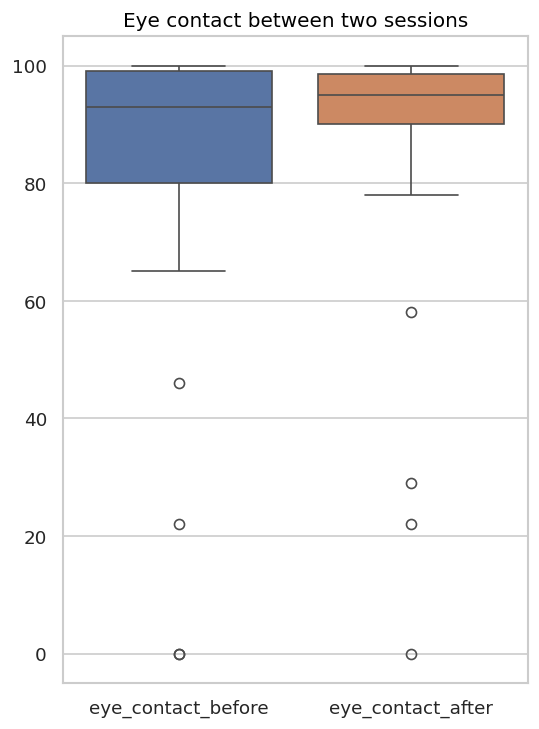

In [54]:
plt.figure(figsize=(5,7), dpi = 120)
plt.minorticks_off()
x = num1['eye_contact']
y = num2['eye_contact']
df = pd.concat([x, y], axis=1)
df.columns = ['eye_contact_before', 'eye_contact_after']
sns.boxplot(df)
# labels text
plt.title('Eye contact between two sessions', fontsize=12, fontweight=0, color='black')
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Eye contact')
plt.show()

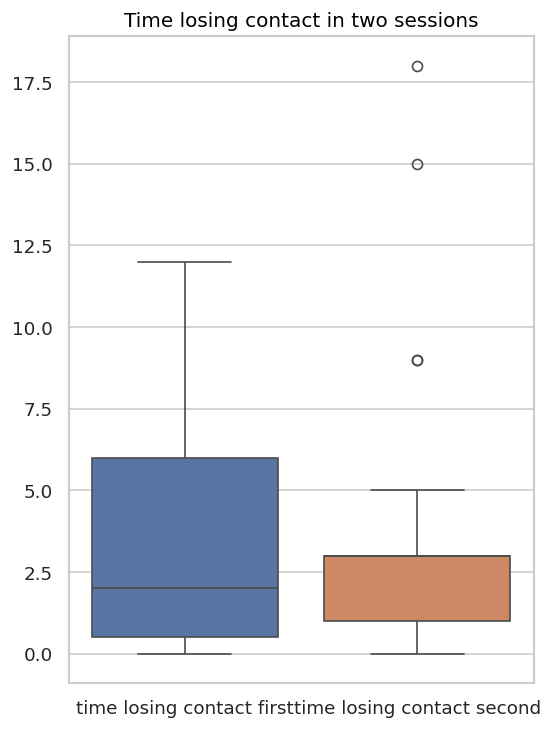

In [55]:
plt.figure(figsize=(5,7), dpi = 120)
plt.minorticks_off()
x = num1[num1['time_losing_contact']<20].time_losing_contact
y = num2[num2['time_losing_contact']<20].time_losing_contact
df = pd.concat([x, y], axis=1)
df.columns = ['time losing contact first', 'time losing contact second']
sns.boxplot(df)
# labels text
plt.title('Time losing contact in two sessions', fontsize=12, fontweight=0, color='black')
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Eye contact')
plt.show()

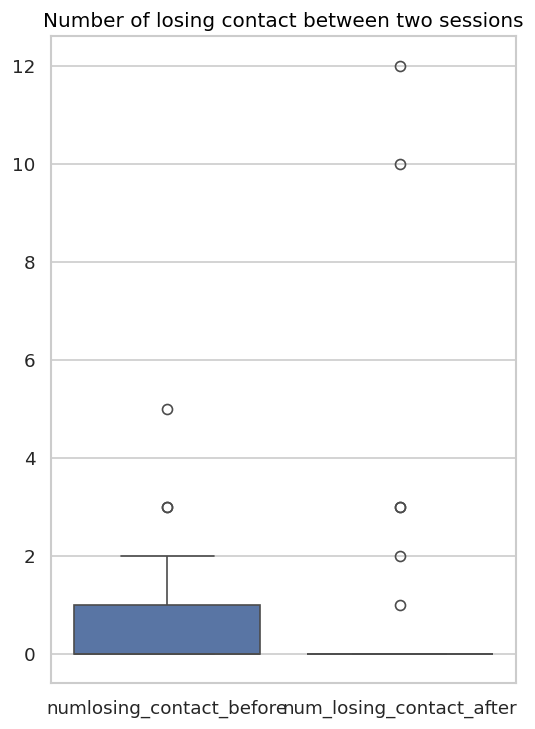

In [56]:
plt.figure(figsize=(5,7), dpi = 120)
plt.minorticks_off()
x = num1['number_losing']
y = num2['number_losing']
df = pd.concat([x, y], axis=1)
df.columns = ['numlosing_contact_before', 'num_losing_contact_after']
sns.boxplot(df)
# labels text
plt.title('Number of losing contact between two sessions', fontsize=12, fontweight=0, color='black')
#ax.set_xlabel('Sessions')
#ax.set_ylabel('Eye contact')
plt.show()